In [20]:
import numpy as np
import matplotlib.pyplot as plt

This code is a that predicts the xor function using neural networks
Neural Network is a machine learning model were it learns from the given training examples and finally predicting the test examples.
This code uses logistic regression technique to predict the output. The neural network is a very basic one as it doesnot contain any hidden layers. It just has an input layer and an output layer. Think the structure of the neural network like of a net where is has lots of nodes from which many strings are attached to the other nodes. In this specific program I have only inserted 3 nodes of which 2 are of inputs and one of the output.
A structure has  main componets:-
Initialization - randomly initials weights(w1) and biases(b1)
forward propagation  - Going forward of the network 
cost compution - tell us on how to get the best weights and biases
backward propagation - to get the gradients of weights and biases which help in the updating of the parameters
update parameters - to update weights and biases to get the best predicted result

In [21]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [22]:
def intialize_with_zeros():
    w1=np.random.randn(1,2)
    b1=0
    return w1,b1

In [23]:
def propagate(w1,b1,X,Y):
    m=X.shape[1]
    #Forward Propagation
    z1=np.dot(w1,X)+b1
    A1=sigmoid(z1)
    #cost compution
    cost = -1*(np.sum(np.dot(Y,(np.log(A1).T))+np.dot(1-Y,(np.log(1-A1).T)),axis=1,keepdims=True))/m 
    #this is the specific cost function in logistic regression
    
    #Backward Propagation
    dw1 = (np.dot(X,(A1-Y).T)/m ).T   
    db1 = ((np.sum(A1-Y))/m).T
    
    
    
    assert(dw1.shape == w1.shape)
    assert(db1.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw1": dw1,
             "db1": db1}
    
    return grads, cost

In [24]:
def optimize(w1,b1,X,Y,num_iterations,learning_rate,print_cost):
    costs = []
    
    for i in range(num_iterations):
        
        
        
        grads, cost = propagate(w1, b1, X, Y)
        
        dw1 = grads["dw1"]
        db1 = grads["db1"]
        #Updating the parameters
        w1 = w1-learning_rate*dw1
        b1 = b1-learning_rate*db1
        
        if i % 100 == 0:
            costs.append(cost)
        
     
        
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
      
    
    params = {"w1": w1,
              "b1": b1}
    
    grads = {"dw1": dw1,
             "db1": db1}
    
    return params, grads, costs
    

In [25]:
def predict(w1,b1,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
   
    A1 = sigmoid(np.dot(w1,X)+b1)
    
    
    for i in range(A1.shape[1]):
        
       
        if(A1[0,i]<=0.5):
            Y_prediction[0,i]=0
        elif(A1[0,i]>0.5):
            Y_prediction[0,i]=1
        
        
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

Cost after iteration 0: 0.674152
Cost after iteration 100: 0.672013
Cost after iteration 200: 0.669961
Cost after iteration 300: 0.667992
Cost after iteration 400: 0.666103
Cost after iteration 500: 0.664290
Cost after iteration 600: 0.662550
Cost after iteration 700: 0.660880
Cost after iteration 800: 0.659276
Cost after iteration 900: 0.657736
Cost after iteration 1000: 0.656257
Cost after iteration 1100: 0.654836
Cost after iteration 1200: 0.653471
Cost after iteration 1300: 0.652160
Cost after iteration 1400: 0.650901
Cost after iteration 1500: 0.649690
Cost after iteration 1600: 0.648527
Cost after iteration 1700: 0.647408
Cost after iteration 1800: 0.646333
Cost after iteration 1900: 0.645300
train accuracy: 87.5 %
test accuracy: 66.66666666666667 %
[[0. 1. 1. 1. 0. 1. 1. 0.]]
[[0. 1. 1.]]


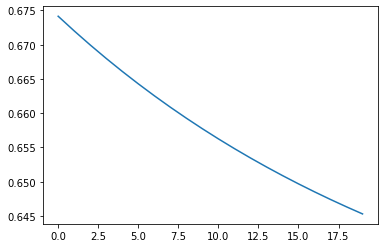

In [26]:
X=np.array([[0,0,1,1,0,1,0,0],[0,1,0,1,0,0,1,0]])

Y=np.array([[0,1,1,0,0,1,1,0]])

X_t=np.array([[0,1,0],[0,0,1]])

Y_t=np.array([0,1,0])

w1,b1=intialize_with_zeros()
parameters, grads, costs =optimize(w1, b1, X, Y, num_iterations=2000, learning_rate=0.005, print_cost=True)
w1 = parameters["w1"]
b1 = parameters["b1"]


Y_prediction = predict(w1, b1, X)
Y_prediction_t = predict(w1, b1, X_t)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - Y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_t - Y_t)) * 100))
print(str(Y_prediction))
print(str(Y_prediction_t))


plt.plot(costs)